# How to use a Public API (Application Program Iinterface) | Using a Public API with Python

In [ ]:
# https://coinmarketcap.com/

In [ ]:
# https://coinmarketcap.com/api/

In [1]:
# It is directly excerpted from the Python code in the API Documentation of the Crypto API.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
# Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c2c1c427-366d-416a-9ffd-fb49e1e9dfe4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2024-03-02T07:59:45.000Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 8890}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10844, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [2]:
import pandas as pd

# This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10844,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964243e+07,1.964243e+07,False,NaN,1,NaN,NaN,None,2024-03-02T07:59:00.000Z,62088.689621,3.896646e+10,-29.7123,0.023038,1.005043,21.608636,47.180472,36.458998,57.212249,1.219573e+12,52.1943,1.303862e+12,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
1,1027,Ethereum,ETH,ethereum,8486,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201389e+08,1.201389e+08,True,NaN,2,NaN,NaN,None,2024-03-02T07:59:00.000Z,3435.895566,1.667588e+10,-31.7996,-0.131034,1.994133,16.035510,51.319808,43.877346,58.713185,4.127846e+11,17.6731,4.127846e+11,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
2,825,Tether USDt,USDT,tether,76666,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.917934e+10,1.016001e+11,True,NaN,3,NaN,NaN,None,2024-03-02T07:58:00.000Z,1.001063,8.064081e+10,-17.4475,-0.016031,0.068986,0.137587,0.166226,0.054917,0.074320,9.928473e+10,4.2508,1.017080e+11,None,2024-03-02T07:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-02 07:59:50.455937
3,1839,BNB,BNB,bnb,2080,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495421e+08,1.495421e+08,False,NaN,4,NaN,NaN,None,2024-03-02T07:58:00.000Z,410.227112,1.579904e+09,-18.0459,0.141910,1.731389,8.194860,37.621472,29.110758,79.794422,6.134621e+10,2.6265,6.134621e+10,None,2024-03-02T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.428249e+08,5.708772e+08,True,NaN,5,NaN,NaN,None,2024-03-02T07:59:00.000Z,129.193396,3.883517e+09,-42.3512,-0.285322,-2.060471,26.542981,36.026909,12.777754,101.809871,5.721005e+10,2.4494,7.375356e+10,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
5,52,XRP,XRP,xrp,1237,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.466403e+10,9.998785e+10,False,NaN,6,NaN,NaN,None,2024-03-02T07:59:00.000Z,0.630662,2.480367e+09,-18.4392,0.897374,7.878411,16.288477,27.918595,-0.161528,1.651054,3.447454e+10,1.4760,6.306622e+10,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
6,3408,USDC,USDC,usd-coin,16970,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.902759e+10,2.902759e+10,False,NaN,7,NaN,NaN,None,2024-03-02T07:59:00.000Z,0.999992,7.512549e+09,-21.0653,0.002171,0.002944,-0.002589,-0.039664,-0.002046,0.006384,2.902735e+10,1.2425,2.902735e+10,None,2024-03-02T07:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-02 07:59:50.455937
7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.547978e+10,3.667143e+10,False,NaN,8,NaN,NaN,None,2024-03-02T07:58:00.000Z,0.734702,1.317952e+09,1.7115,-0.998841,10.445866,25.511500,49.500132,16.992174,85.356246,2.606707e+10,1.1166,3.306160e+10,None,2024-03-02T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
8,74,Dogecoin,DOGE,dogecoin,899,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN

In [4]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c2c1c427-366d-416a-9ffd-fb49e1e9dfe4',
        
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #NOTE:
    # I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    # Into the Anaconda Prompt to change this to allow to pull data
    
    # 1. Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    
    # df = df.append(df2)
    # df = df2.append(df2)
    
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append])
    
    
    


    
    # 2. Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Projects\API.csv'):
     #   df.to_csv(r'C:\Projects\API.csv', header='column_names')
    #else:
     #  df.to_csv(r'C:\Projects\API.csv', mode='a', header=False)   # 'a' means append mode
        
    # Then to read in the file: 
    #df = pd.read_csv(r'C:\Projects\API.csv')

In [ ]:
'''
df_append = pd.DataFrame(df2)
df = pd.concat([df, df_append])
The provided code is used to concatenate two DataFrame objects.

Here is the breakdown:
1. `df2` is an existing DataFrame object.
2. `df_append` is a new DataFrame object created using the data from `df2`:

```python
df_append = pd.DataFrame(df2)
```

This line of code creates a new DataFrame by constructing it with the data from `df2`, resulting in a DataFrame that is identical to `df2`.

3. The `pd.concat()` function is used to concatenate multiple DataFrames. By default, it performs a column-wise concatenation, meaning it combines the columns from different DataFrames.
   - `[df, df_append]` specifies the DataFrame objects to be concatenated, resulting in the concatenation of `df` and `df_append`.
   - The concatenation is performed column-wise.
   - Alternatively, `axis=0` can be specified for row-wise concatenation.

The resulting DataFrame, `df`, is the concatenation of `df` and `df_append`.

In summary, the purpose of this code is:
- Constructing a new DataFrame object, `df_append`, using the data from `df2`.
- Concatenating `df` and `df_append` DataFrame objects together.
- Assigning the concatenated DataFrame back to `df`.

The objective is to append new row data to `df`.
'''

In [ ]:
import os 
from time import time
from time import sleep

for i in range(1):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


In [68]:
# 1. test if csv file worked

df72 = pd.read_csv(r'C:\Projects\API.csv')
df72

In [4]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10844,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964243e+07,1.964243e+07,False,NaN,1,NaN,NaN,None,2024-03-02T07:59:00.000Z,62088.689621,3.896646e+10,-29.7123,0.023038,1.005043,21.608636,47.180472,36.458998,57.212249,1.219573e+12,52.1943,1.303862e+12,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
1,1027,Ethereum,ETH,ethereum,8486,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201389e+08,1.201389e+08,True,NaN,2,NaN,NaN,None,2024-03-02T07:59:00.000Z,3435.895566,1.667588e+10,-31.7996,-0.131034,1.994133,16.035510,51.319808,43.877346,58.713185,4.127846e+11,17.6731,4.127846e+11,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
2,825,Tether USDt,USDT,tether,76666,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.917934e+10,1.016001e+11,True,NaN,3,NaN,NaN,None,2024-03-02T07:58:00.000Z,1.001063,8.064081e+10,-17.4475,-0.016031,0.068986,0.137587,0.166226,0.054917,0.074320,9.928473e+10,4.2508,1.017080e+11,None,2024-03-02T07:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-02 07:59:50.455937
3,1839,BNB,BNB,bnb,2080,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495421e+08,1.495421e+08,False,NaN,4,NaN,NaN,None,2024-03-02T07:58:00.000Z,410.227112,1.579904e+09,-18.0459,0.141910,1.731389,8.194860,37.621472,29.110758,79.794422,6.134621e+10,2.6265,6.134621e+10,None,2024-03-02T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.428249e+08,5.708772e+08,True,NaN,5,NaN,NaN,None,2024-03-02T07:59:00.000Z,129.193396,3.883517e+09,-42.3512,-0.285322,-2.060471,26.542981,36.026909,12.777754,101.809871,5.721005e+10,2.4494,7.375356e+10,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
5,52,XRP,XRP,xrp,1237,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.466403e+10,9.998785e+10,False,NaN,6,NaN,NaN,None,2024-03-02T07:59:00.000Z,0.630662,2.480367e+09,-18.4392,0.897374,7.878411,16.288477,27.918595,-0.161528,1.651054,3.447454e+10,1.4760,6.306622e+10,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
6,3408,USDC,USDC,usd-coin,16970,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.902759e+10,2.902759e+10,False,NaN,7,NaN,NaN,None,2024-03-02T07:59:00.000Z,0.999992,7.512549e+09,-21.0653,0.002171,0.002944,-0.002589,-0.039664,-0.002046,0.006384,2.902735e+10,1.2425,2.902735e+10,None,2024-03-02T07:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-02 07:59:50.455937
7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.547978e+10,3.667143e+10,False,NaN,8,NaN,NaN,None,2024-03-02T07:58:00.000Z,0.734702,1.317952e+09,1.7115,-0.998841,10.445866,25.511500,49.500132,16.992174,85.356246,2.606707e+10,1.1166,3.306160e+10,None,2024-03-02T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
8,74,Dogecoin,DOGE,dogecoin,899,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN

In [5]:
# 2. Data cleaning

# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)


'''
The given code is used to set the display format for floating-point numbers in Pandas.

Here is the breakdown:
- `pd.set_option()`: Sets global parameter options for Pandas.
- `'display.float_format'`: Sets the parameter for the display format of floating-point numbers.
- `lambda x: '%.5f' % x`:
   - `lambda` defines an anonymous function with `x` as the input parameter.
   - `'%.5f'` is a string formatting code that formats `x` as a floating-point number with 5 decimal places.
   - `%` is the string formatting operator.

In summary, the code sets the default display format option in Pandas for floating-point numbers to a 5-decimal-place format.

The effect of this code is that when any Pandas object, such as a DataFrame, is printed, the floating-point numbers within it will be automatically formatted to display up to 5 decimal places. The purpose is to present floating-point numbers in a neater and more readable fixed-point format, without excessively long decimal digits.

In conclusion, this line of code controls the printing precision of floating-point numbers in Pandas to 5 decimal places.
'''

In [6]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10844,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19642431.00000,19642431.00000,False,NaN,1,NaN,NaN,None,2024-03-02T07:59:00.000Z,62088.68962,38966462547.30330,-29.71230,0.02304,1.00504,21.60864,47.18047,36.45900,57.21225,1219572801766.96655,52.19430,1303862482047.47998,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
1,1027,Ethereum,ETH,ethereum,8486,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120138874.30530,120138874.30530,True,NaN,2,NaN,NaN,None,2024-03-02T07:59:00.000Z,3435.89557,16675878262.11812,-31.79960,-0.13103,1.99413,16.03551,51.31981,43.87735,58.71319,412784625499.09515,17.67310,412784625499.09998,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
2,825,Tether USDt,USDT,tether,76666,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,99179337470.68521,101600078701.91211,True,NaN,3,NaN,NaN,None,2024-03-02T07:58:00.000Z,1.00106,80640812536.08136,-17.44750,-0.01603,0.06899,0.13759,0.16623,0.05492,0.07432,99284728896.97705,4.25080,101708042492.34000,None,2024-03-02T07:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-02 07:59:50.455937
3,1839,BNB,BNB,bnb,2080,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149542077.09917,149542077.09917,False,NaN,4,NaN,NaN,None,2024-03-02T07:58:00.000Z,410.22711,1579904441.91264,-18.04590,0.14191,1.73139,8.19486,37.62147,29.11076,79.79442,61346214440.69553,2.62650,61346214440.70000,None,2024-03-02T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,442824870.56493,570877190.75478,True,NaN,5,NaN,NaN,None,2024-03-02T07:59:00.000Z,129.19340,3883516962.48429,-42.35120,-0.28532,-2.06047,26.54298,36.02691,12.77775,101.80987,57210049047.94203,2.44940,73753563212.85001,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
5,52,XRP,XRP,xrp,1237,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54664031281.00000,99987852435.00000,False,NaN,6,NaN,NaN,None,2024-03-02T07:59:00.000Z,0.63066,2480366853.30998,-18.43920,0.89737,7.87841,16.28848,27.91860,-0.16153,1.65105,34474540130.50122,1.47600,63066223479.36000,None,2024-03-02T07:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-02 07:59:50.455937
6,3408,USDC,USDC,usd-coin,16970,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29027593175.02472,29027593175.02472,False,NaN,7,NaN,NaN,None,2024-03-02T07:59:00.000Z,0.99999,7512548972.62267,-21.06530,0.00217,0.00294,-0.00259,-0.03966,-0.00205,0.00638,29027350320.78310,1.24250,29027350320.78000,None,2024-03-02T07:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-02 07:59:50.455937
7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35479784625.53400,36671429496.44700,False,NaN,8,NaN,NaN,None,2024-03-02T07:58:00.000Z,0.73470,1317951760.77379,1.71150,-0.99884,10.44587,25.51150,49.50013,16.99217,85.35625,26067074114.11683,1.11660,33061596836.50000,None,2024-03-02T07:58:0

In [9]:
# 3. Grouping by and calculating the mean

# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02304,1.00504,21.60864,47.18047,36.45900,57.21225
Ethereum,-0.13103,1.99413,16.03551,51.31981,43.87735,58.71319
Tether USDt,-0.01603,0.06899,0.13759,0.16623,0.05492,0.07432
BNB,0.14191,1.73139,8.19486,37.62147,29.11076,79.79442
Solana,-0.28532,-2.06047,26.54298,36.02691,12.77775,101.80987
XRP,0.89737,7.87841,16.28848,27.91860,-0.16153,1.65105
USDC,0.00217,0.00294,-0.00259,-0.03966,-0.00205,0.00638
Cardano,-0.99884,10.44587,25.51150,49.50013,16.99217,85.35625
Dogecoin,3.32676,24.05896,72.82670,86.42153,57.03145,72.02426


In [ ]:
'''
The provided code performs the following operations:

1. `df` is the original DataFrame data.
2. Grouping the data by the 'name' column using `groupby`.
3. The `sort=False` parameter specifies not to sort the groups.
4. `[[...]]` specifies the columns to be aggregated, including multiple columns for percentage changes.
5. `mean()` specifies to calculate the mean of these columns within each group.
6. The result is assigned to a new DataFrame, `df3`.

The specific meaning is:
- Grouping the data by the cryptocurrency name in the 'name' field.
- Calculating the average percentage change for each column within each group, considering different time intervals such as 1 hour, 24 hours, etc.
- Returning a new DataFrame where the index is the cryptocurrency name and the values are the average percentage changes for each time window.

In summary, the code performs grouping and aggregation on the original data, calculating the average percentage changes of different cryptocurrencies within different time windows. 
This allows us to observe the overall trends of different cryptocurrencies within different time frames, facilitating further analysis.
'''

In [ ]:
# 4. stack method: Here, the stack method is used to list each time period corresponding to each name, essentially changing the format.

In [10]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.02304
             quote.USD.percent_change_24h     1.00504
             quote.USD.percent_change_7d     21.60864
             quote.USD.percent_change_30d    47.18047
             quote.USD.percent_change_60d    36.45900
             quote.USD.percent_change_90d    57.21225
Ethereum     quote.USD.percent_change_1h     -0.13103
             quote.USD.percent_change_24h     1.99413
             quote.USD.percent_change_7d     16.03551
             quote.USD.percent_change_30d    51.31981
             quote.USD.percent_change_60d    43.87735
             quote.USD.percent_change_90d    58.71319
Tether USDt  quote.USD.percent_change_1h     -0.01603
             quote.USD.percent_change_24h     0.06899
             quote.USD.percent_change_7d      0.13759
             quote.USD.percent_change_30d     0.16623
             quote.USD.percent_change_60d     0.05492
             quote.USD.percent_change_90

In [23]:
type(df3)

pandas.core.frame.DataFrame

In [11]:
type(df4)

pandas.core.series.Series

In [ ]:
'''
df4 = df3.stack() means:
- The stack() method is used to pivot the column names into index levels.
- For df3, it has two levels of indexing: the first level is the 'name', and the second level is actually the 'time window' hidden within the values.
- stack() will separate these two levels, where:
  - The first level index remains as the 'name'.
  - The second level index becomes the original 'time window' previously hidden within the values.
  - The values become the last level of indexing.

Therefore, the resulting df4 is:
- The first level index is the 'name'.
- The second level index is the 'time window'.
- The values represent the original average percentage values corresponding to the name and time window.

In summary, the stack() method elevates the secondary structure (in this case, the time window) previously hidden within the values to explicit multiple levels of indexing, 
which facilitates subsequent processing operations.
'''

In [ ]:
# 5. Convert a Series with a multi-level index into DataFrame format.

In [12]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.02304
            quote.USD.percent_change_24h   1.00504
            quote.USD.percent_change_7d   21.60864
            quote.USD.percent_change_30d  47.18047
            quote.USD.percent_change_60d  36.45900
            quote.USD.percent_change_90d  57.21225
Ethereum    quote.USD.percent_change_1h   -0.13103
            quote.USD.percent_change_24h   1.99413
            quote.USD.percent_change_7d   16.03551
            quote.USD.percent_change_30d  51.31981
            quote.USD.percent_change_60d  43.87735
            quote.USD.percent_change_90d  58.71319
Tether USDt quote.USD.percent_change_1h   -0.01603
            quote.USD.percent_change_24h   0.06899
            quote.USD.percent_change_7d    0.13759
            quote.USD.percent_change_30d   0.16623
            quote.USD.percent_change_60d   0.05492
            quote.USD.percent_change_90d   0.07432
BNB         quote.USD.percent_change_1h    0.14191
            quote.USD.percent_change_24h   1.73139
            quote.USD.percent_change_7d    8.19486
            quote.USD.percent_change_30d  37.62147
            quote.USD.percent_change_60d  29.11076
            quote.USD.percent_change_90d  79.79442
Solana      quote.USD.percent_change_1h   -0.28532
            quote.USD.percent_change_24h  -2.06047
            quote.USD.percent_change_7d   26.54298
            quote.USD.percent_change_30d  36.02691
            quote.USD.percent_change_60d  12.77775
            quote.USD.percent_change_90d 101.80987
XRP         quote.USD.percent_change_1h    0.89737
            quote.USD.percent_change_24h   7.87841
            quote.USD.percent_change_7d   16.28848
            quote.USD.percent_change_30d  27.91860
            quote.USD.percent_change_60d  -0.16153
            quote.USD.percent_change_90d   1.65105
USDC        quote.USD.percent_change_1h    0.00217
            quote.USD.percent_change_24h   0.00294
            quote.USD.percent_change_7d   -0.00259
            quote.USD.percent_change_30d  -0.03966
            quote.USD.percent_change_60d  -0.00205
            quote.USD.percent_change_90d   0.00638
Cardano     quote.USD.percent_change_1h   -0.99884
            quote.USD.percent_change_24h  10.44587
            quote.USD.percent_change_7d   25.51150
            quote.USD.percent_change_30d  49.50013
            quote.USD.percent_change_60d  16.99217
            quote.USD.percent_change_90d  85.35625
Dogecoin    quote.USD.percent_change_1h    3.32676
            quote.USD.percent_change_24h  24.05896
            quote.USD.percent_change_7d   72.82670
            quote.USD.percent_change_30d  86.42153
            quote.USD.percent_change_60d  57.03145
            quote.USD.percent_change_90d  72.02426
Avalanche   quote.USD.percent_change_1h   -0.82184
            quote.USD.percent_change_24h   1.63559
            quote.USD.percent_change_7d   17.27208
            quote.USD.percent_change_30d  27.54418
            quote.USD.percent_change_60d  -1.51487
            quote.USD.percent_change_90d  92.10537
Shiba Inu   quote.USD.percent_change_1h    6.53913
            quote.USD.percent_change_24h  75.37809
            quote.USD.percent_change_7d  133.65736
            quote.USD.percent_change_30d 150.04733
            quote.USD.percent_change_60d 106.03879
            quote.USD.percent_change_90d 161.09066
Chainlink   quote.USD.percent_change_1h   -0.84211
            quote.USD.percent_change_24h   7.70490
            quote.USD.percent_change_7d   15.19416
            quote.USD.percent_change_30d  34.89903
            quote.USD.percent_change_60d  33.63678
            quote.USD.percent_change_90d  30.92528
TRON        quote.USD.percent_change_1h   -0.05379
            quote.USD.percent_change_24h  -0.08450
            quote.USD.percent_change_7d    1.99521
            quote.USD.percent_change_30d  24.55711
            quote.USD.percent_change_60d  29.53112
            quo

In [ ]:
'''
df4 is a Series object with two levels of indexing: 'name' and 'time window'.

The code df5 = df4.to_frame(name='values') means:

The to_frame() method converts the Series into DataFrame format.
name='values' specifies that the resulting DataFrame will have only one column named 'values'.
The purpose of this operation is:

Series structure is not ideal for subsequent processing, such as adding new columns.
Converting it to a DataFrame makes it easier to manipulate and retains the original indexing structure.
As a result, df5 becomes a DataFrame in the format:
values
name time window

It has only one column, 'values', and maintains the original multi-level indexing structure with 'name' and 'time window'.

In simple terms, the code converts a Series with a multi-level index into DataFrame format, making it easier for subsequent data processing.
'''

In [ ]:
# 6. Count the number of non-NA values.

In [13]:
df5.count()

values    90
dtype: int64

In [ ]:
'''
The meaning of df5.count() is to count the number of non-NA values in the df5 DataFrame.

Specifically:

df5 is a DataFrame that retains the original multi-level indexing structure of the 'name' and 'time window' from the Series.
df5 has only one column named 'values' containing numerical values.
count() is a DataFrame method used to count the number of non-NA values for each level of the index.
Here, the levels of the index are the combination of 'name' and 'time window' in the multi-level index.
Therefore, executing df5.count() will return a series:

name time window
count

The 'count' column in this series represents the count of non-NA values in the 'values' column for each combination of 'name' and 'time window'.

In simple terms, df5.count() calculates the number of non-NA values for each combination of the index levels in the df5 DataFrame. 
It is equivalent to checking the presence of missing values. This can be used to identify any data gaps for specific 'name' or 'time window' combinations, providing reference for further analysis.
'''

In [ ]:
# 7. set new index

In [14]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,0.02304
1,1.00504
2,21.60864
3,47.18047
4,36.45900
5,57.21225
6,-0.13103
7,1.99413
8,16.03551
9,51.31981


In [24]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02304
1,Bitcoin,quote.USD.percent_change_24h,1.00504
2,Bitcoin,quote.USD.percent_change_7d,21.60864
3,Bitcoin,quote.USD.percent_change_30d,47.18047
4,Bitcoin,quote.USD.percent_change_60d,36.45900
5,Bitcoin,quote.USD.percent_change_90d,57.21225
6,Ethereum,quote.USD.percent_change_1h,-0.13103
7,Ethereum,quote.USD.percent_change_24h,1.99413
8,Ethereum,quote.USD.percent_change_7d,16.03551
9,Ethereum,quote.USD.percent_change_30d,51.31981


In [25]:
# 8. Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02304
1,Bitcoin,quote.USD.percent_change_24h,1.00504
2,Bitcoin,quote.USD.percent_change_7d,21.60864
3,Bitcoin,quote.USD.percent_change_30d,47.18047
4,Bitcoin,quote.USD.percent_change_60d,36.45900
5,Bitcoin,quote.USD.percent_change_90d,57.21225
6,Ethereum,quote.USD.percent_change_1h,-0.13103
7,Ethereum,quote.USD.percent_change_24h,1.99413
8,Ethereum,quote.USD.percent_change_7d,16.03551
9,Ethereum,quote.USD.percent_change_30d,51.31981


In [ ]:
# 9. modify the format

In [53]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.02304
1,Bitcoin,24h,1.00504
2,Bitcoin,7d,21.60864
3,Bitcoin,30d,47.18047
4,Bitcoin,60d,36.45900
5,Bitcoin,90d,57.21225
6,Ethereum,1h,-0.13103
7,Ethereum,24h,1.99413
8,Ethereum,7d,16.03551
9,Ethereum,30d,51.31981


In [ ]:
# 10. plot

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

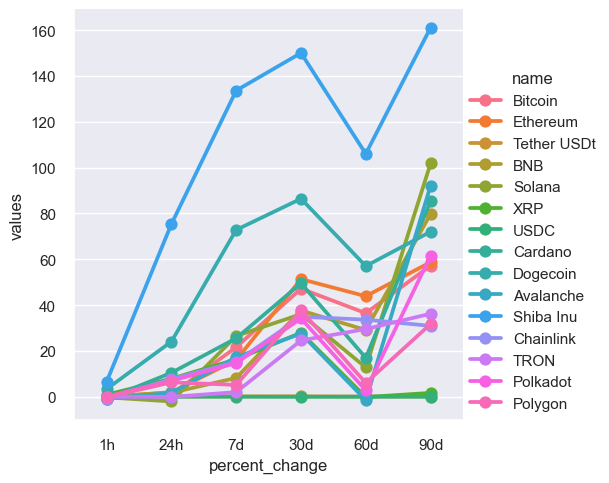

In [55]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
'''
This code uses the catplot function from Seaborn to create a scatter plot with the following functionalities and meanings:
- catplot is one of the advanced plotting functions in Seaborn, used for creating charts based on categorical variables.
- catplot is short for Categorical Plot in Seaborn.
- The x-axis represents the 'percent_change' variable, and the y-axis represents the 'values' variable.
- The hue parameter specifies coloring (color categorization) the data based on the 'name' variable.
- The data parameter is set as df7 DataFrame.
- The kind parameter specifies the type of chart, and in this case, 'point' is chosen, resulting in a scatter plot.

In simpler terms, the purpose of this code is to create a scatter plot based on the df7 DataFrame. 
It uses the 'percent_change' and 'values' variables as the x and y axes, respectively, and differentiates the data points by color based on the 'name' variable. 
This creates a scatter plot with multiple categories.

This allows for convenient observation of the relationship or distribution between the two numerical variables within different categories of 'name'. 
Additionally, the color categorization aids data exploration.

Therefore, this catplot primarily utilizes the categorical variable 'name' to create a scatter plot representing a categorical measure. 
It showcases the relationship between the two numerical variables within different categories.
'''

In [ ]:
# 11. simplify the query

In [56]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,62088.68962,2024-03-02 07:59:50.455937


In [ ]:
'''
In Pandas, using a single pair of square brackets [] allows us to select columns from a DataFrame. 
For example, df['name'] will select the column named 'name'.

However, in the case of df[['name','quote.USD.price','timestamp']], we use double brackets [].
This is because we want to select multiple columns, not just a single column.

Specifically, the outer pair of square brackets [] indicates that we are performing a column selection operation. 
Within the inner pair of square brackets [], 'name', 'quote.USD.price', and 'timestamp' are a list containing the names of the columns we want to select.

By using this approach, we can simultaneously select multiple columns and create a new DataFrame, df10, that includes the data from the 'name', 'quote.USD.price', and 'timestamp' columns.

In summary, the double brackets [] are used to select multiple columns, creating a new DataFrame, df10, that contains the data from the 'name', 'quote.USD.price', and 'timestamp' columns.
'''

In [ ]:
# 12. plot

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

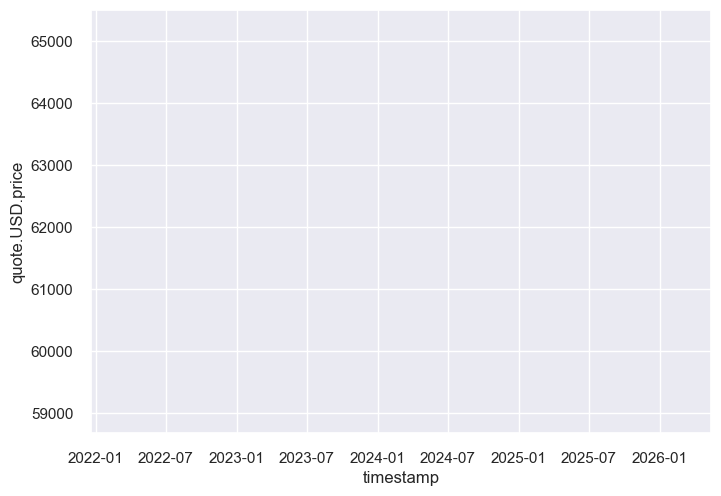

In [57]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

In [ ]:
'''
This code uses Seaborn to plot a line graph of time series data:
- sns.set_theme(style="darkgrid") sets the theme style to a dark grid style.
- sns.lineplot() is the line plot function in Seaborn.
- The x-axis is represented by the 'timestamp' field, indicating the time series index.
- The y-axis is represented by the 'quote.USD.price' field, which corresponds to the price data.
- The data parameter is set as the df10 DataFrame.

So, the meaning of this code is:
Based on the time series index ('timestamp') and price data ('quote.USD.price') in the df10 DataFrame:
- Set the theme style to a dark grid.
- Plot a line graph where the x-axis represents the time series and the y-axis represents the price trend.
- Visualize the trend of price changes over time using a line.

In summary, this code utilizes the line plot function in Seaborn to create a line graph of the price variation in time series data from the df10 DataFrame. 
It visually represents the fluctuation of prices over time within the specified time range.
'''